In [134]:
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px
import geopandas as gpd

In [135]:
reader = pd.read_csv(r'/Users/kamil/Documents/data_mining/measurements.csv', iterator=True)

In [136]:
df = reader.get_chunk(1000)

In [137]:
df

,Captured Time,Latitude,Longitude,Value,Unit,Location Name,Device ID,MD5Sum,Height,Surface,Radiation,Uploaded Time,Loader ID
0,2022-03-19 01:58:57,42.434700,-87.901200,13.0,cpm,"Wadsworth, IL",216.0,1002ef96f395a21fadedbccad74feef5,NaN,NaN,NaN,2022-03-19 01:59:58.047487,NaN
1,2022-03-19 01:59:53.317925,39.753929,-104.959059,16.0,cpm,Denver,232.0,3e8114a4fb6bc62fee955918e2d187fa,NaN,NaN,NaN,2022-03-19 01:59:53.40923,NaN
2,2022-03-19 01:59:33,37.637260,139.660360,-1000.0,status,NaN,100299.0,1fa4c2489566850218610282debd5994,60.0,NaN,NaN,2022-03-19 01:59:33.09046,NaN
3,2022-03-19 01:59:32,37.637260,139.660360,0.0,cpm,NaN,100292.0,3b662b2c40693a9084ebb226e64a1eba,60.0,NaN,NaN,2022-03-19 01:59:32.549568,NaN
4,2022-03-19 01:59:31.332,53.864000,-3.047000,21.0,cpm,NaN,245.0,bbc4072ab00c289c773de9167874b381,NaN,NaN,NaN,2022-03-19 01:59:32.044945,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-03-19 01:07:25,35.745910,139.918150,13.0,cpm,NaN,100162.0,32e351998192d6a57349dd549955e829,20.0,NaN,NaN,2022-03-19 01:07:25.637464,NaN
996,2022-03-19 01:07:25,35.745910,139.918150,36.0,cpm,NaN,100161.0,1a0f6782160b692484c49ba36e0c84af,20.0,NaN,NaN,2022-03-19 01:07:25.114742,NaN
997,2022-03-19 01:07:23.428,53.864000,-3.047000,21.6,cpm,NaN,245.0,c41997416c5590cea55f3434e95f003c,NaN,NaN,NaN,2022-03-19 01:07:24.034336,NaN
998,2022-03-19 01:07:22,37.494708,139.926040,15.3,celcius,NaN,100369.0,03df14247037bc654e2049bba1e9db07,219.0,NaN,NaN,2022-03-19 01:07:22.947269,NaN


In [138]:
df.drop(labels=['Location Name','Device ID','MD5Sum','Surface','Radiation','Uploaded Time','Loader ID'], axis=1, inplace=True)

In [139]:
df

,Captured Time,Latitude,Longitude,Value,Unit,Height
0,2022-03-19 01:58:57,42.434700,-87.901200,13.0,cpm,NaN
1,2022-03-19 01:59:53.317925,39.753929,-104.959059,16.0,cpm,NaN
2,2022-03-19 01:59:33,37.637260,139.660360,-1000.0,status,60.0
3,2022-03-19 01:59:32,37.637260,139.660360,0.0,cpm,60.0
4,2022-03-19 01:59:31.332,53.864000,-3.047000,21.0,cpm,NaN
...,...,...,...,...,...,...
995,2022-03-19 01:07:25,35.745910,139.918150,13.0,cpm,20.0
996,2022-03-19 01:07:25,35.745910,139.918150,36.0,cpm,20.0
997,2022-03-19 01:07:23.428,53.864000,-3.047000,21.6,cpm,NaN
998,2022-03-19 01:07:22,37.494708,139.926040,15.3,celcius,219.0


In [140]:
df.dropna(subset=['Height','Value'], axis=0, inplace=True)

In [141]:
df = df.reset_index(drop=True)

In [142]:
df

,Captured Time,Latitude,Longitude,Value,Unit,Height
0,2022-03-19 01:59:33,37.637260,139.660360,-1000.0,status,60.0
1,2022-03-19 01:59:32,37.637260,139.660360,0.0,cpm,60.0
2,2022-03-19 01:59:31,37.637260,139.660360,37.0,cpm,60.0
3,2022-03-19 01:59:20,42.565000,-70.783000,26.0,status,10.0
4,2022-03-19 01:59:20,37.496139,140.986419,18.1,status,10.0
...,...,...,...,...,...,...
732,2022-03-19 01:07:26,35.745910,139.918150,20.4,status,20.0
733,2022-03-19 01:07:25,35.745910,139.918150,13.0,cpm,20.0
734,2022-03-19 01:07:25,35.745910,139.918150,36.0,cpm,20.0
735,2022-03-19 01:07:22,37.494708,139.926040,15.3,celcius,219.0


In [143]:
df = df.loc[df['Unit'] == 'cpm']
df['Unit'].unique()

array(['cpm'], dtype=object)

In [144]:
df

,Captured Time,Latitude,Longitude,Value,Unit,Height
1,2022-03-19 01:59:32,37.637260,139.660360,0.0,cpm,60.0
2,2022-03-19 01:59:31,37.637260,139.660360,37.0,cpm,60.0
5,2022-03-19 01:59:20,42.565000,-70.783000,13.0,cpm,10.0
6,2022-03-19 01:59:19,42.565000,-70.783000,24.0,cpm,10.0
7,2022-03-19 01:59:19.611,37.442836,-122.128094,29.0,cpm,3.0
...,...,...,...,...,...,...
730,2022-03-19 01:07:27,35.268280,136.249300,16.0,cpm,100.0
731,2022-03-19 01:07:27,35.268280,136.249300,0.0,cpm,100.0
733,2022-03-19 01:07:25,35.745910,139.918150,13.0,cpm,20.0
734,2022-03-19 01:07:25,35.745910,139.918150,36.0,cpm,20.0


In [146]:
locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [147]:
con = df['Latitude'].apply(str)+ ", " + df['Longitude'].apply(str)
# print(con)
print(con[1])
location = rgeocode(con[1])
print(location.raw['address'].get('province'))
print(kanji_dict.get(location.raw['address'].get('town')))

37.63726, 139.66036
福島県
Nishiaizu


In [129]:
location.raw['address'].get('province') == "福島県"

True

In [148]:
fukushima_pref = "福島県"
kanji_dict = {
    "会津坂下町": "Aizubange",
    "会津美里町": "Aizumisato",
    "会津若松市": "Aizuwakamatsu",
    "浅川町": "Asakawa",
    "磐梯町": "Bandai",
    "伊達市": "Date",
    "福島市": "Fukushima",
    "古殿町": "Furudono",
    "双葉町": "Futaba",
    "塙町": "Hanawa",
    "檜枝岐村": "Hinoemata",
    "平田村": "Hirata",
    "広野町": "Hirono",
    "飯舘村": "Iitate",
    "猪苗代町": "Inawashiro",
    "石川町": "Ishikawa",
    "いわき市": "Iwaki",
    "泉崎村": "Izumizaki",
    "鏡石町": "Kagamiishi",
    "金山町": "Kaneyama",
    "葛尾村": "Katsurao",
    "川俣町": "Kawamata",
    "川内村": "Kawauchi",
    "喜多方市": "Kitakata",
    "北塩原村": "Kitashiobara",
    "桑折町": "Koori",
    "郡山市": "Kōriyama",
    "国見町": "Kunimi",
    "三春町": "Miharu",
    "南会津町": "Minamiaizu",
    "南相馬市": "Minamisōma",
    "三島町": "Mishima",
    "本宮市": "Motomiya",
    "中島村": "Nakajima",
    "浪江町": "Namie",
    "楢葉町": "Naraha",
    "二本松市": "Nihonmatsu",
    "西会津町": "Nishiaizu",
    "西郷村": "Nishigō",
    "大熊町": "Ōkuma",
    "小野町": "Ono",
    "大玉村": "Ōtama",
    "鮫川村": "Samegawa",
    "下郷町": "Shimogō",
    "新地町": "Shinchi",
    "白河市": "Shirakawa",
    "昭和村": "Shōwa",
    "相馬市": "Sōma",
    "須賀川市": "Sukagawa",
    "只見町": "Tadami",
    "玉川村": "Tamakawa",
    "田村市": "Tamura",
    "棚倉町": "Tanagura",
    "天栄村": "Ten’ei",
    "富岡町": "Tomioka",
    "矢吹町": "Yabuki",
    "矢祭町": "Yamatsuri",
    "柳津町": "Yanaizu",
    "湯川村": "Yugawa"
}

In [149]:
d = {'a': 1, 'b': 2, 'c': 3}

ser = pd.Series(data=d, index=['a', 'b', 'c'])
print(f"{ser[1]}, {ser[2]}")

2, 3


In [132]:
def getFukushimaCountry(x):
    con = f"{x[1]}, {x[2]}"
    location = rgeocode(con)
    if location.raw['address'].get('province') == "福島県":
        print(kanji_dict.get(location.raw['address'].get('town')), location.raw['address'].get('town'))
        return kanji_dict.get(location.raw['address'].get('town'))

In [133]:
df['Country'] = df.apply(lambda x : getFukushimaCountry(x), axis=1)

Nishiaizu 西会津町
Nishiaizu 西会津町
Namie 浪江町
None None
None None
Namie 浪江町
None None
None None
None None
None None
None None
None None
Hirono 広野町
Hirono 広野町
None None
None None
None None
None None
None None
None None
Namie 浪江町
Namie 浪江町
None None
None None
Nishiaizu 西会津町
Nishiaizu 西会津町
None None
None None
Namie 浪江町
Namie 浪江町
None None
None None
None None
None None
None None
None None
Hirono 広野町
Hirono 広野町
None None
None None
None None
None None
None None
None None
Namie 浪江町
Namie 浪江町
None None
None None
Nishiaizu 西会津町
Nishiaizu 西会津町
None None
None None
Namie 浪江町
Namie 浪江町
None None
None None
None None
None None
None None
None None
Hirono 広野町
Hirono 広野町
None None
None None
None None
None None
None None
None None
Namie 浪江町
Namie 浪江町
None None
None None
Nishiaizu 西会津町
Nishiaizu 西会津町
None None
None None
Namie 浪江町
Namie 浪江町
None None
None None
None None
None None
None None
None None
Hirono 広野町
Hirono 広野町
None None
None None
None None
None None
None None
None None
Namie 浪江町
None None
None None
Na

/var/folders/nw/33yg0j5505z5m7qg10v31rcm0000gn/T/ipykernel_4484/3237021334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df.apply(lambda x : getFukushimaCountry(x), axis=1)


array([None], dtype=object)

In [150]:
radiation_value = df['Value'].values
height = df['Height'].values

In [151]:
correlation = df["Value"].corr(df["Height"])
correlation

-0.055015942222026264

In [152]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [153]:
print(gdf.head())

             Captured Time   Latitude   Longitude  Value Unit  Height  \
1      2022-03-19 01:59:32  37.637260  139.660360    0.0  cpm    60.0   
2      2022-03-19 01:59:31  37.637260  139.660360   37.0  cpm    60.0   
5      2022-03-19 01:59:20  42.565000  -70.783000   13.0  cpm    10.0   
6      2022-03-19 01:59:19  42.565000  -70.783000   24.0  cpm    10.0   
7  2022-03-19 01:59:19.611  37.442836 -122.128094   29.0  cpm     3.0   

                      geometry  
1   POINT (139.66036 37.63726)  
2   POINT (139.66036 37.63726)  
5   POINT (-70.78300 42.56500)  
6   POINT (-70.78300 42.56500)  
7  POINT (-122.12809 37.44284)  


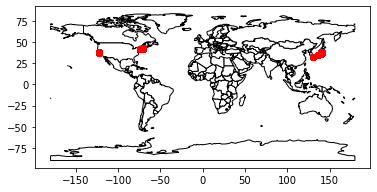

In [154]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

